<h1> <center> Methods to Converting Non- stationary into stationary </center> </h1>

<hr></hr>

<h2><center>Objectives</center><h2>

In this module, we will learn to implement the following ways to convert any non-stationary time series to stationary time series

●        Detrending

●        Differencing

●        Transformation

<hr></hr>

<h2> <b>Step 1:</b> Importing all the required packages. </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<hr></hr>
<h2> <b>Step 2:</b> Accessing, Importing, Clearning, and Pre-Processing Data </h2>

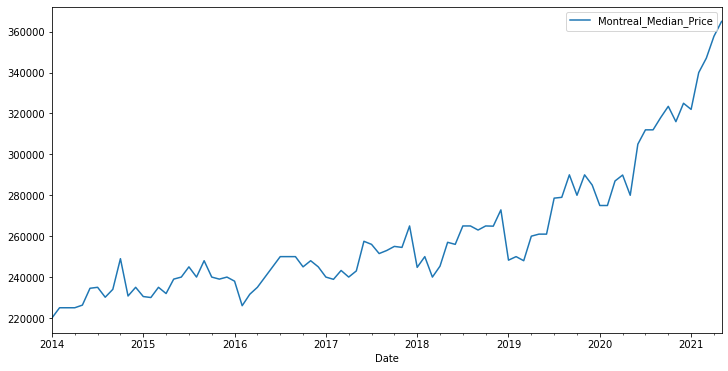

In [2]:
data_orig = pd.read_csv('quebec_real_estate.csv')
data_orig['Date'] = pd.to_datetime(data_orig['Date']) # convert date column to DateTime
ax = data_orig.plot(x='Date', y='Montreal_Median_Price', figsize=(12,6))

<hr></hr>
<h2><center>How to Detrend a Time Series?</center></h2>

Detrending a time series is to remove the trend component from a time series. But how to extract the trend? There are multiple approaches.

1. Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, you may want to use quadratic terms (x^2) in the model.
2. Subtract the trend component obtained from time series decomposition we saw earlier.

3. Subtract the mean

4. Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.

Let’s implement the first two methods.

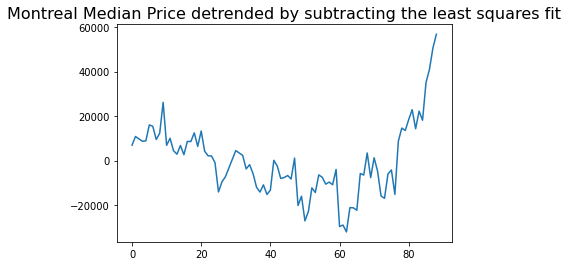

In [3]:
# Using scipy: Subtract the line of best fit
from scipy import signal

detrended = signal.detrend(data_orig.Montreal_Median_Price.values)
plt.plot(detrended)
plt.title('Montreal Median Price detrended by subtracting the least squares fit', fontsize=16)
plt.show()

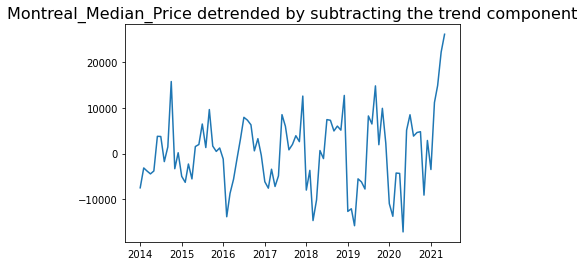

In [4]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
data_orig = pd.read_csv('quebec_real_estate.csv', parse_dates=['Date'],  index_col='Date')
result_mul = seasonal_decompose(data_orig['Montreal_Median_Price'], model='multiplicative', extrapolate_trend='freq')
detrended = data_orig.Montreal_Median_Price.values - result_mul.trend
plt.plot(detrended)
plt.title('Montreal_Median_Price detrended by subtracting the trend component', fontsize=16)
plt.show()

<hr></hr>
<h2><center>Differencing</center></h2>

<hr></hr>

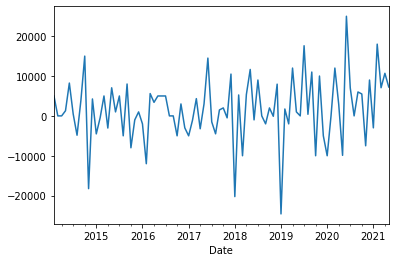

In [5]:
data_orig = pd.read_csv('quebec_real_estate.csv', parse_dates=['Date'],  index_col='Date')
data_orig['Montreal_Median_Price'] = data_orig['Montreal_Median_Price'] - data_orig['Montreal_Median_Price'].shift(1)
data_orig['Montreal_Median_Price'].dropna().plot()
plt.show()

<hr></hr>
<h2><center>Seasonal Differencing</center></h2>

<hr></hr>

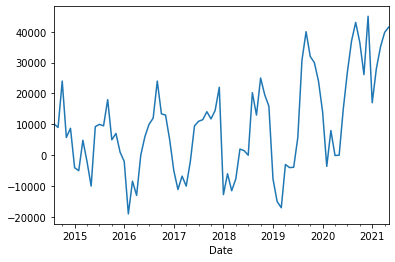

In [6]:
data_orig = pd.read_csv('quebec_real_estate.csv', parse_dates=['Date'],  index_col='Date')
n=7
data_orig['Montreal_Median_Price'] = data_orig['Montreal_Median_Price'] - data_orig['Montreal_Median_Price'].shift(n)
data_orig['Montreal_Median_Price'].dropna().plot()
plt.show()

<hr></hr>
<h2><center>Transformation</center></h2>
Transformations are used to stabilize the non-constant variance of a series. Common transformation methods include power transform, square root, and log transform. Let’s do a quick log transform and differencing on our dataset:
<hr></hr>



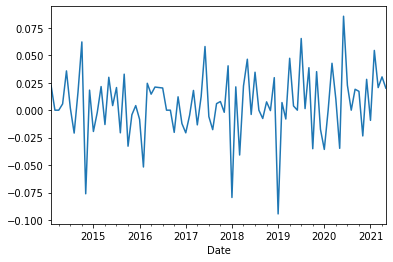

In [7]:
data_orig = pd.read_csv('quebec_real_estate.csv', parse_dates=['Date'],  index_col='Date')
data_orig['Montreal_Median_Price'] = np.log(data_orig['Montreal_Median_Price'])
data_orig['Montreal_Median_Price'] =data_orig['Montreal_Median_Price'] - data_orig['Montreal_Median_Price'].shift(1)
data_orig['Montreal_Median_Price'].dropna().plot()
plt.show()

<hr></hr>
<h2><center>References</h2></center>

1. [A Gentle Introduction to Handling a Non-Stationary Time Series in Python](https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/)
2. [Complete Guide on Time Series Analysis in Python](https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python/notebook)
